# Predicting Economic Recessions Using Technical Indicators -- Diagrams

This notebook provides the codes for diagram 1 and 2 in Predicting Economic Recessions Using Technical Indicators. We first strat with some imports, and load the data of anxious index.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
anxious_index = pd.read_csv("/Users/cheukheiyip/Desktop/1. ML paper/Anxious Index 2000-2018.csv")
anxious_index['Date'] = pd.to_datetime(anxious_index['Date'], format = '%Y-%m-%d')

### Functions of Plotting Graphs

We define the function ```graph``` for plotting Figure 1. Moreover, for interested readers, this function can also plot the graphs for other prediction models with situatable pickles loaded.

In [4]:
def graph (date, predicted_y, actual_y):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_ylim([-0.05,1.05])
    ax.fill_between(date,-2,2, where = actual_y > 0, facecolor = 'grey', alpha = 0.5, label = "Actual Recession")
    ax.plot(date, predicted_y,label = "Predicted Recession")
    ax.legend()
    plt.show()

### Plotting Graphs

The graphs of different sets of predictors are plotted.

First we need to load the pickle that saves the results of the comprehensive models.

In [5]:
# Remember to save the pickles at the correct directory
with open('Comprehensive_A_B.pickle', 'rb') as file:
    Comprehensive_A_B = pickle.load(file)

#### Figure 1

As mentioned in the paper, the forecast signal is too noisy for practical usage.

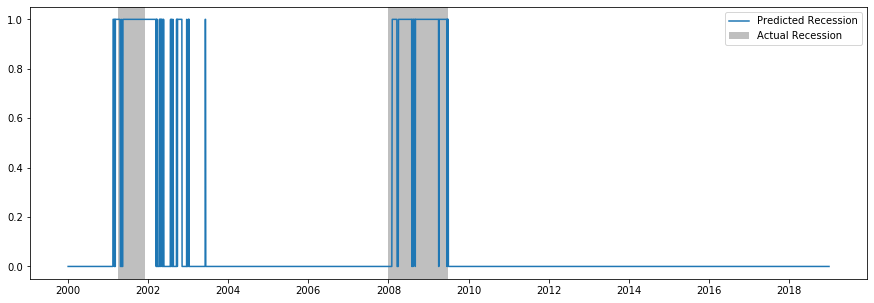

In [7]:
graph(Comprehensive_A_B['date_A'],Comprehensive_A_B['prediction_A'],Comprehensive_A_B['actual_A'])

#### Figure 2

It is obvious that the comprehensive model performs much better than anxious index with threshold = 40 (ie. the best anxious index model). 

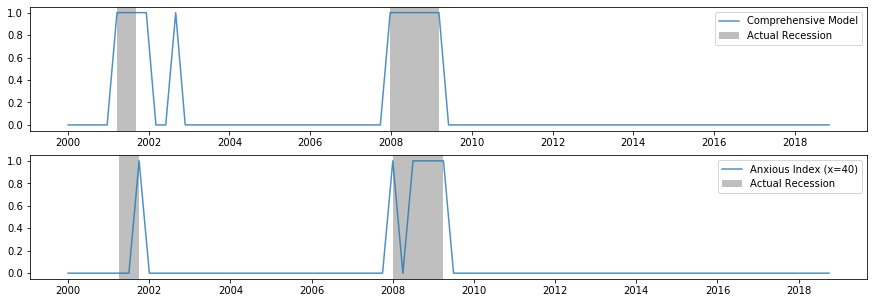

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

# Subplot 1 -- Comprehensive Model B
ax[0].set_ylim([-0.05,1.05])
ax[0].fill_between(Comprehensive_A_B['date_B'],-2,2, where = Comprehensive_A_B['actual_B'] > 0, facecolor = 'grey', alpha = 0.5, label = "Actual Recession")
ax[0].plot(Comprehensive_A_B['date_B'],Comprehensive_A_B['prediction_B'],alpha = 0.8, label = "Comprehensive Model")
ax[0].legend()


# Subplot 2 -- Anxious Index
ax[1].set_ylim([-0.05,1.05])
ax[1].fill_between(anxious_index['Date'],-2,2, where = anxious_index['Actual Recession'] > 0, facecolor = 'grey', alpha = 0.5, label = "Actual Recession")
ax[1].plot(anxious_index['Date'],anxious_index['Prediction'],alpha = 0.8, label = "Anxious Index (x=40)")
ax[1].legend()

plt.show()

Note that while the anxious index model gives quarterly signals, the comprehensive mdoel actually gives **effective** quarterly signals. The recession periods as reference points in these two models are sightly different from each other, and so two seperate graphs are needed for fair comparison. 